# Sample Notebook for Katharina

In [ ]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

# LLC Table

## We will use pandas to load and hold the table of LLC analysis results

access to the desired directory

In [2]:
os.getenv('ENDPOINT_URL') 

'http://rook-ceph-rgw-nautiluss3.rook'

load_main_table reads the file and returns data frame

In [3]:
tbl_file = 's3://llc/Tables/test_noise_modis2012.parquet'
#  If s3 isn't working, you will need to use a copy of the file on your own computer
# e.g.
#tbl_file = '/tank/xavier/Oceanography/AI/OOD/LLC/Tables/test_noise_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_noise_modis2012.parquet


## View

### Most of the columns are described here: https://github.com/AI-for-Ocean-Science/ulmo/blob/main/ulmo/defs.py

In [4]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.124990,3.401999,6.411,...,64,0,487936,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,124.020691
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315350,3.464000,6.544,...,64,0,517068,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,45.473206
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.912542,3.557000,6.852,...,64,0,58066,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,159.249695
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859069,3.442000,6.709,...,64,0,76355,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,153.434143
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.131550,5.386000,6.852,...,64,0,523013,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,148.887573


In [5]:
llc_table.shape

(635295, 26)

In [6]:
llc_table[2060:2070]

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
2060,-45.587822,59.845486,933,2012-01-02 21:20:00,-201.774292,176,0.042358,12.110143,8.564,15.734,...,64,0,27438,-45.594479,59.843750,5218,4664,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-1065.839111
2061,-45.554237,57.835686,805,2012-01-02 21:20:00,-129.738708,197,0.048340,8.748451,7.394,11.211,...,64,0,57733,-45.553638,57.843750,5221,4568,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-88.533142
2062,-45.532814,59.323303,901,2012-01-02 21:20:00,-174.306091,176,0.018738,9.936068,8.484,15.080,...,64,0,322344,-45.526398,59.322918,5223,4639,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-179.110962
2063,-45.470940,56.951252,741,2012-01-02 21:20:00,-134.548706,200,0.049866,9.663330,7.737,12.461,...,64,0,510299,-45.471874,56.947918,5227,4525,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-264.852539
2064,-45.478027,58.826620,869,2012-01-02 21:20:00,-144.084473,176,0.013611,9.158224,8.432,12.351,...,64,0,455752,-45.471874,58.822918,5227,4615,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,89.585449
2065,-45.458150,57.408237,773,2012-01-02 21:20:00,-159.077820,192,0.048889,9.019794,7.514,12.215,...,64,0,617698,-45.458237,57.406250,5228,4547,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-105.853088
2066,-45.441890,59.888350,933,2012-01-02 21:20:00,-235.667419,159,0.049927,12.727991,8.600,15.734,...,64,0,243779,-45.444595,59.885418,5229,4666,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-441.961243
2067,-45.423330,58.351210,837,2012-01-02 21:20:00,-122.705688,176,0.017273,8.994871,7.557,11.068,...,64,0,115577,-45.417309,58.343750,5231,4592,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-58.873169
2068,-45.377323,56.789852,727,2012-01-02 21:20:00,-102.646240,192,0.049622,9.998802,7.956,12.461,...,64,0,555745,-45.376350,56.781250,5234,4517,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-370.282440
2069,-45.368553,57.893467,805,2012-01-02 21:20:00,-149.683838,176,0.021057,8.924738,7.603,11.828,...,64,0,449428,-45.362690,57.885418,5235,4570,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,-65.276611


creating a column : temp range 

In [7]:
llc_table['DT'] = llc_table.T90 - llc_table.T10
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.124990,3.401999,6.411,...,0,487936,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,124.020691,1.898000
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315350,3.464000,6.544,...,0,517068,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,45.473206,2.702001
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.912542,3.557000,6.852,...,0,58066,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,159.249695,1.059000
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859069,3.442000,6.709,...,0,76355,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,153.434143,1.102000
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.131550,5.386000,6.852,...,0,523013,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,148.887573,1.012001


# Equatorial Pacific

## Let us isolate the cutouts in the Pacific near the equator with high LL

### Pacific

180 deg W to 150 deg W

In [8]:
# This is a small piece 
in_pacific = (llc_table.lon > -180.) & (llc_table.lon < -150.)

### Near Equator

10 deg S to 10 deg N

In [41]:
near_equator = np.abs(llc_table.lat) < 10.

### high LL

LL ranges about from -3000 to 1000

In [10]:
highLL = llc_table.LL > 700.

In [11]:
sub_tbl = llc_table[in_pacific & near_equator & highLL]

### check if it's captured the right data

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


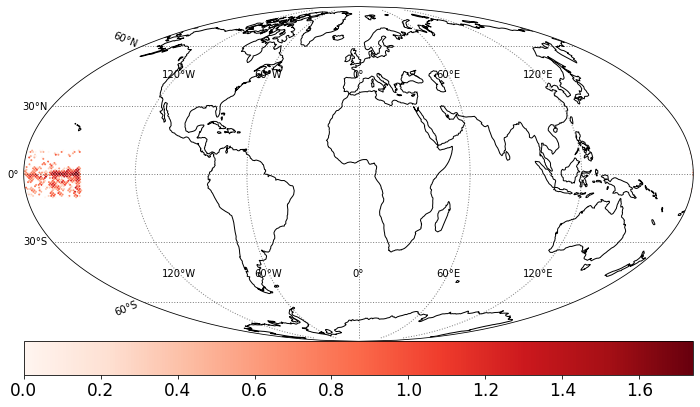

In [12]:
_ = ulmo_figs.show_spatial(sub_tbl)

In [13]:
test = llc_table.query('-150 > lon > -180 & -10 < lat < 10 & LL > 700')
test == sub_tbl

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
242,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
245,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
246,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
247,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
251,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632068,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
632069,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
632070,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
632071,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [14]:
sub_tbl.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
242,-3.130523,-161.63765,389,2012-01-01 12:10:00,495.246216,481,0.047668,26.224907,26.028000,26.751001,...,0,530983,-3.121485,-161.635422,7726,11313,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,748.095520,0.259001
245,-3.027235,-161.28703,421,2012-01-01 12:10:00,628.006470,464,0.006775,26.202333,25.963001,26.467001,...,0,593727,-3.025058,-161.281250,7731,11330,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,741.925537,0.333000
246,-2.980542,-161.60338,389,2012-01-01 12:10:00,593.781677,464,0.017761,26.206188,26.014000,26.705000,...,0,178174,-2.986482,-161.593750,7733,11315,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,734.269653,0.243000
247,-2.958587,-159.75120,581,2012-01-01 12:10:00,265.493408,432,0.025452,26.091520,25.874001,26.390001,...,0,480660,-2.967194,-159.760422,7734,11403,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,730.128357,0.313999
251,-2.820349,-161.72964,374,2012-01-01 12:10:00,463.220337,449,0.049866,26.193914,25.961000,26.466002,...,0,163933,-2.812861,-161.739578,7742,11308,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,743.652771,0.231001


In [15]:
len(sub_tbl)

2987

This selection is about 0.005% the size of the previous data selection.

In [16]:
sub_tbl.shape

(2987, 27)

# Plot a few cutouts

## Grab the first one

Grabbing the row with index 0; returns a Series obj

In [17]:
cutout0 = sub_tbl.iloc[0]
cutout0

modis_lat                                                   -3.130523
modis_lon                                                  -161.63765
modis_col                                                         389
modis_datetime                                    2012-01-01 12:10:00
modis_LL                                                   495.246216
modis_row                                                         481
clear_fraction                                               0.047668
mean_temperature                                            26.224907
Tmin                                                           26.028
Tmax                                                        26.751001
T90                                                         26.373001
T10                                                            26.114
modis_filename                   AQUA_MODIS.20120101T121008.L2.SST.nc
modis_UID                                           13258686951836235
pp_file             

Temperature range in image

In [18]:
delta_T = cutout0.Tmax - cutout0.Tmin
delta_T

0.7230014801025391

### Image

Returns a numpy.ndarray of the image

In [43]:
# This uses s3
img0 = llc_io.grab_image(cutout0)
# For a local file, use
#local_preproc = '/tank/xavier/Oceanography/AI/OOD/LLC/PreProc/LLC_modis2012_test_noise_preproc.h5'
#img0 = llc_io.grab_image(cutout0, local_file=local_preproc)
img0



array([[ 0.588274  ,  0.56809044,  0.4024334 , ...,  0.0260849 ,
        -0.09526634, -0.00358582],
       [ 0.34908867,  0.5298214 ,  0.5354748 , ..., -0.10767174,
         0.1038475 , -0.05033684],
       [ 0.62635803,  0.58376884,  0.68073845, ...,  0.0409317 ,
        -0.1502819 ,  0.16503906],
       ...,
       [ 0.02660942,  0.17743492, -0.03905869, ..., -0.12021065,
        -0.12718582, -0.0575695 ],
       [ 0.05289459, -0.01693535, -0.06962395, ...,  0.01027298,
        -0.01964378, -0.01535606],
       [-0.0722332 ,  0.0221386 ,  0.05792999, ..., -0.18898582,
        -0.08925819, -0.09667015]], dtype=float32)

In [44]:
import numpy

numpy.mean(img0)

2.6635826e-07

In [20]:
sum_pix = 0
for i in range(0, 64):
    
    for j in range(0, 64):
        
        sum_pix += img0[i][j] 

mean = sum_pix / (64*64)
mean

2.6635825634002686e-07

In [21]:
import numpy
m = 1
for i in range(0, 64): 
    
    maximum = numpy.amin( img0[0, :] )
    
    if maximum < m:
        m = maximum
m

-0.27480698

## One more

<AxesSubplot:>

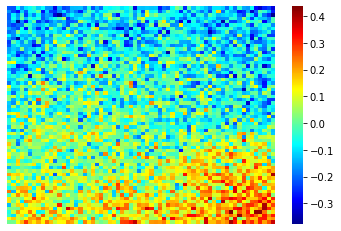

In [22]:
cutout100 = sub_tbl.iloc[100]
img100 = llc_io.grab_image(cutout100) # , local_file=local_preproc)
ulmo_plotting.show_image(img100)

In [23]:
llc_table.modis_datetime[5]

Timestamp('2012-01-01 04:05:00')

In [24]:
date0 = llc_table[(llc_table.modis_datetime >= pandas.to_datetime('2012-01-01 00:00:00')) & (llc_table.modis_datetime < pandas.to_datetime('2012-01-02 00:00:00'))]

In [25]:
llc_table.modis_datetime[0] == pandas.to_datetime('2012-01-01 04:10:00')

True

In [26]:
date0.shape

(1184, 27)

In [27]:
date1 = llc_table[(llc_table.modis_datetime >= pandas.to_datetime('2012-01-02 00:00:00')) & (llc_table.modis_datetime < pandas.to_datetime('2012-01-03 00:00:00'))]

In [28]:
date1[1413:3116]

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
2795,16.690344,71.930010,773,2012-01-02 21:00:00,483.366272,1328,0.005188,27.354370,26.688002,27.948000,...,0,592988,16.689079,71.927086,8767,5244,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,415.360046,0.644999
2796,16.697891,92.860374,389,2012-01-02 19:20:00,244.850037,1840,0.034058,26.974934,26.064001,27.663000,...,0,397534,16.689079,92.864586,8767,6249,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,318.446899,0.849001
2797,16.698864,67.790080,357,2012-01-02 21:00:00,481.614990,1392,0.004700,26.469215,25.845001,26.972000,...,0,556140,16.707441,67.781250,8768,5045,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,473.760864,0.654001
2798,16.719978,69.759360,549,2012-01-02 21:00:00,513.681274,1360,0.014404,27.094307,26.478001,27.491001,...,0,115455,16.725801,69.760414,8769,5140,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,505.276611,0.518000
2799,16.746200,67.433970,325,2012-01-02 21:00:00,410.450256,1392,0.037598,26.337372,25.845001,26.893002,...,0,622301,16.744160,67.427086,8770,5028,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,483.045837,0.585001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,23.244024,67.061230,197,2012-01-02 21:00:00,-188.749451,688,0.021484,24.162407,18.222000,24.976002,...,0,464659,23.221136,67.052086,9130,5010,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,37.019775,1.457001
3113,25.488295,52.430153,1014,2012-01-02 22:35:00,43.597168,1860,0.049255,21.194841,18.514999,24.079000,...,0,551978,25.713379,52.427082,9273,4308,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,18.614685,3.146000
3114,25.197653,52.440304,1020,2012-01-02 22:35:00,64.957825,1891,0.049744,21.227587,18.616001,24.098000,...,0,271474,25.713379,52.447918,9273,4309,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,17.276550,3.159000
3115,25.726446,52.408040,1008,2012-01-02 22:35:00,77.023010,1834,0.049377,21.201944,18.431999,24.041000,...,0,267274,25.730633,52.406250,9274,4307,2012-01-03,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T00_00_...,23.626587,3.141001


In [29]:
3116-1413
3116+1703

4819

In [30]:
date2 = llc_table[(llc_table.modis_datetime >= pandas.to_datetime('2012-01-03 00:00:00')) & (llc_table.modis_datetime < pandas.to_datetime('2012-01-04 00:00:00'))]

In [31]:
date2.shape

(1067, 27)

# LL Histogram Plot

(0.0, 10000.0)

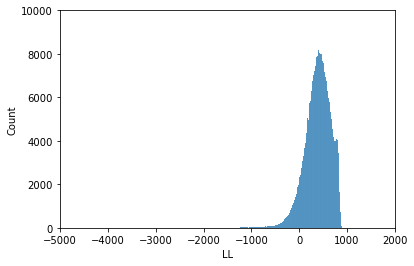

In [32]:
# Give histplot the dataframe and the column name
ax = sns.histplot(data=llc_table, x='LL')
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 10000.)

(0.0, 200.0)

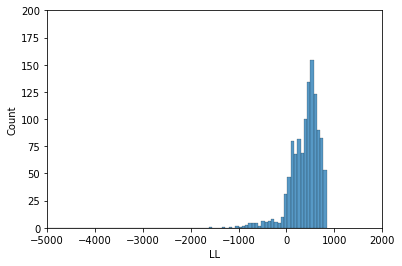

In [33]:
date0 = llc_table[(llc_table.modis_datetime >= pandas.to_datetime('2012-01-01 00:00:00')) & (llc_table.modis_datetime < pandas.to_datetime('2012-01-02 00:00:00'))]
ax0 = sns.histplot( data = date0, x = 'LL')
ax0.set_xlim(-5000, 2000.)
ax0.set_ylim(0., 200.)

(0.0, 200.0)

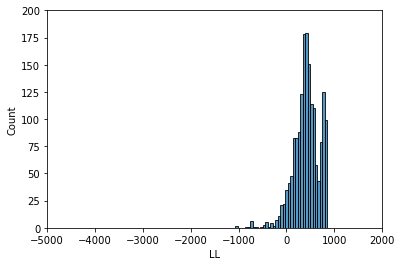

In [34]:
date1 = llc_table[(llc_table.modis_datetime >= pandas.to_datetime('2012-01-02 00:00:00')) & (llc_table.modis_datetime < pandas.to_datetime('2012-01-03 00:00:00'))]
ax1 = sns.histplot( data = date1, x = 'LL')
ax1.set_xlim(-5000, 2000.)
ax1.set_ylim(0., 200.)

(0.0, 200.0)

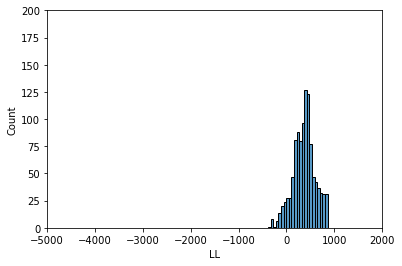

In [35]:
date2 = llc_table[(llc_table.modis_datetime >= pandas.to_datetime('2012-01-03 00:00:00')) & (llc_table.modis_datetime < pandas.to_datetime('2012-01-04 00:00:00'))]
ax2 = sns.histplot( data = date2, x = 'LL')
ax2.set_xlim(-5000, 2000.)
ax2.set_ylim(0., 200.)

In [36]:
date0_lowLL= date0[ (date0.LL < -1000) ]
date1_lowLL= date1[ (date1.LL < -1000) ]
date2_lowLL= date2[ (date2.LL < -1000) ]

date0.shape

(1184, 27)

# Low LL Global Map

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


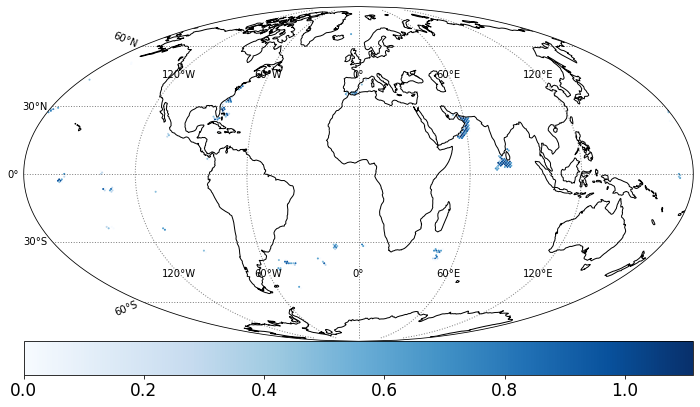

In [37]:
# for 2012-01-01

_ = ulmo_figs.show_spatial(date0, color='Blues')

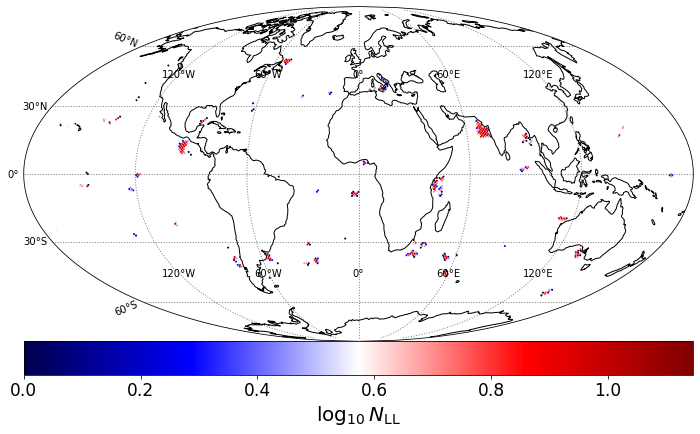

In [38]:
# for 2012-01-02

_ = ulmo_figs.show_spatial(date1, lbl='LL', color='seismic')

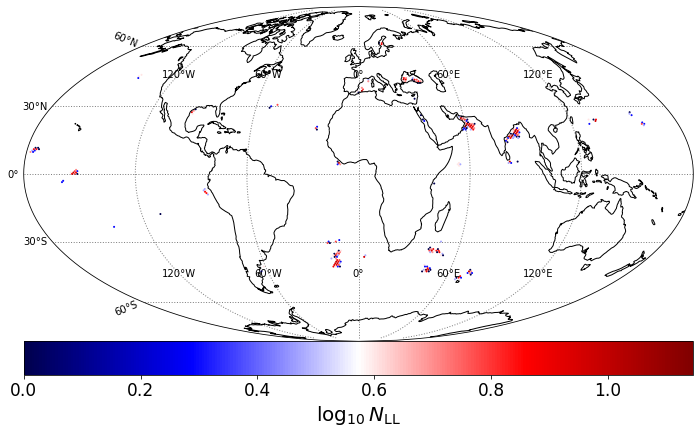

In [39]:
# for 2012-01-03

_ = ulmo_figs.show_spatial(date2, lbl='LL', color='seismic')

# Select by Month, Week, or Day

## by month

source: https://www.delftstack.com/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/

In [40]:
# returns it as a Series object
months = llc_table['modis_datetime'].dt.month

# returns an immutable array
months2 = pandas.DatetimeIndex(llc_table.modis_datetime).month


# Sub table Global Map

In [ ]:
ulmo_figs.show_spatial(sub_tbl, lbl='eq', color='Blues')